In [66]:
import pandas as pd
import numpy as np
from pandas import DataFrame
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopy.distance import great_circle

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import json # library to handle JSON files

import requests # library to handle requests
from requests import get

from bs4 import BeautifulSoup

import re

from time import sleep

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import seaborn as sns

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [67]:
#df_NSW = pd.pandas.read_excel("https://www.planning.nsw.gov.au/2019 NSW Population Projections ASGS 2019 LGA.xlsx", sheet_name='LGA Population projections')
# Create URL to Excel file (alternatively this can be a filepath)
#url = 'https://raw.githubusercontent.com/chrisalbon/simulated_datasets/master/data.xlsx'

# Load the first sheet of the Excel file into a data frame
#df = pd.read_excel(url, sheetname=0, header=1)

#https://www.planning.nsw.gov.au/-/media/Files/DPE/Other/Research-and-demography/Population-Projections/2019-NSW-Population-Projections-ASGS-2019-LGA.xlsx
link ="https://www.planning.nsw.gov.au/-/media/Files/DPE/Other/Research-and-demography/Population-Projections/2019-NSW-Population-Projections-ASGS-2019-LGA.xlsx"
data = pd.read_excel(link, sheet_name='LGA population projections')

#data = pd.read_excel(open(link, 'rb'),sheet_name ='LGA population projections')
data.head(30)
#drop all the data with with NaN values 
data = data.dropna()

data.head()


,NSW 2019 Population Projections,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
4,ASGS 2019 LGA,2016.0,2021.0,2026.0,2031.0,2036.0,2041.0
5,Albury (C),52171.0,54374.0,56490.0,58159.0,59440.0,60383.0
6,Armidale Regional (A),30313.0,32736.0,35226.0,36486.0,37439.0,38124.0
7,Ballina (A),42993.0,44237.0,45364.0,46248.0,46835.0,47092.0
8,Balranald (A),2330.0,2437.0,2552.0,2764.0,2975.0,3185.0


In [57]:
data.columns = ['SydneySuburb', '2016', '2021', '2026','2031','2036','2041']

# pop_nswlga is a lt and data is a dataframe
df_SydSub=data


df_SydSub.head()

,SydneySuburb,2016,2021,2026,2031,2036,2041
4,ASGS 2019 LGA,2016.0,2021.0,2026.0,2031.0,2036.0,2041.0
5,Albury (C),52171.0,54374.0,56490.0,58159.0,59440.0,60383.0
6,Armidale Regional (A),30313.0,32736.0,35226.0,36486.0,37439.0,38124.0
7,Ballina (A),42993.0,44237.0,45364.0,46248.0,46835.0,47092.0
8,Balranald (A),2330.0,2437.0,2552.0,2764.0,2975.0,3185.0


In [68]:

#pop_NswLga.set_index("LGA")
#get population increse prediction % increase from 2016-2041
#pop_NswLga['%Increase/Decrease'] = round((((pop_NswLga['2041']-pop_NswLga['2016'])/pop_NswLga['2016'])*100),2)


list_sydSuburb1 = df_SydSub['SydneySuburb'].to_list()
list_sydSuburb2 = list()

symbol = " ("

for  i in range(len(list_sydSuburb1)) :
    firstVal= (list_sydSuburb1[i])
    indexOfSymbol = (firstVal.find(symbol)) 
    extractedVal = firstVal[:indexOfSymbol]
    list_sydSuburb2.append(extractedVal)
    i += i
#list_NswLga2.append(extractedVal+str(i))
#convert to dataframe

df_SydSubName = DataFrame(list_sydSuburb2,columns=['SydneySuburb'])

df_SydSub['SydneySuburb'] = df_SydSubName['SydneySuburb']


df_SydSub.head()



AttributeError: 'float' object has no attribute 'find'

In [59]:
#Selected suburbs of Sydney
df_selected_Subrub = pd.DataFrame({
   'SydneySuburb':['Sydney','Camden','Blacktown','Liverpool','Parramatta']
    
})

#merge two 

df_selected_Subrub.head()



,SydneySuburb
0,Sydney
1,Camden
2,Blacktown
3,Liverpool
4,Parramatta


In [69]:
df_popTrend = pd.merge(df_SydSub, df_selected_Subrub, on='SydneySuburb',how='inner')
df_popTrend.head(10)


,SydneySuburb,2016,2021,2026,2031,2036,2041
0,Blacktown,164534.0,198945.0,220879.0,229397.0,228720.0,234613.0
1,Camden,18114.0,17272.0,16459.0,15580.0,14635.0,13641.0
2,Liverpool,37694.0,43768.0,48429.0,48497.0,48218.0,49362.0
3,Parramatta,265468.0,269596.0,275246.0,281802.0,288431.0,296625.0
4,Sydney,20558.0,20188.0,19746.0,19169.0,18453.0,17619.0


In [70]:
#get population increse prediction % increase from 2016-2041
df_popTrend['%Increase/Decrease'] = round((((df_popTrend['2041']-df_popTrend['2016'])/df_popTrend['2016'])*100),2)

#arrange them in descending order
df_popTrend = df_popTrend.sort_values("%Increase/Decrease", ascending = False)

In [71]:
df_popTrend.head(10)

,SydneySuburb,2016,2021,2026,2031,2036,2041,%Increase/Decrease
0,Blacktown,164534.0,198945.0,220879.0,229397.0,228720.0,234613.0,42.59
2,Liverpool,37694.0,43768.0,48429.0,48497.0,48218.0,49362.0,30.95
3,Parramatta,265468.0,269596.0,275246.0,281802.0,288431.0,296625.0,11.74
4,Sydney,20558.0,20188.0,19746.0,19169.0,18453.0,17619.0,-14.30
1,Camden,18114.0,17272.0,16459.0,15580.0,14635.0,13641.0,-24.69


In [72]:
df_lga1 = pd.read_html("https://www.latlong.net/category/towns-14-55.html")[0]
df_lga2 = pd.read_html("https://www.latlong.net/category/towns-14-55-2.html")[0]
df_lga3 = pd.read_html("https://www.latlong.net/category/cities-14-15.html")[0]

frames = [df_lga1,df_lga2,df_lga3]
#merging the two tables
df_CityLocation = pd.concat(frames)

df_CityLocation.rename(columns={'Place Name':'SydneySuburb'
                          }, 
                 inplace=True)

df_CityLocation['SydneySuburb'].to_list()

list_lgaName1 = df_popTrend['SydneySuburb'].to_list()

list_lgaName2 = []

for  i in range(len(list_lgaName1)) :
    firstVal= (list_lgaName1[i]).split(',')[0]
    list_lgaName2.insert(i,firstVal)
    i += 1

df_firstName = DataFrame(list_lgaName2,columns=['SydneySuburb']) 
df_CityLocation['SydneySuburb']=df_firstName
df_CityLocation = df_CityLocation.dropna()
df_CityLocation.head(10)


,SydneySuburb,Latitude,Longitude
0,Blacktown,-41.161388,146.234451
1,Liverpool,-35.708057,150.174438
2,Parramatta,-28.643057,153.615005
3,Sydney,-33.861111,121.891945
4,Camden,-31.948999,115.827003
0,Blacktown,-33.942173,151.101456
1,Liverpool,-33.751064,150.852631
2,Parramatta,-30.090109,145.937546
3,Sydney,-29.464411,149.845108
4,Camden,-28.085995,153.422348


In [77]:
#merge location table with selected suburb table
df_popTrend_location = pd.merge(df_popTrend, df_CityLocation, on='SydneySuburb',how='inner')

#remove duplicate records
df_popTrend_location_distict =df_popTrend_location.drop_duplicates(subset='SydneySuburb',keep='last')
df_popTrend_location_distict.head(15)

,SydneySuburb,2016,2021,2026,2031,2036,2041,%Increase/Decrease,Latitude,Longitude
2,Blacktown,164534.0,198945.0,220879.0,229397.0,228720.0,234613.0,42.59,-31.083332,150.916672
5,Liverpool,37694.0,43768.0,48429.0,48497.0,48218.0,49362.0,30.95,-35.353333,149.234161
8,Parramatta,265468.0,269596.0,275246.0,281802.0,288431.0,296625.0,11.74,-33.758011,150.705444
11,Sydney,20558.0,20188.0,19746.0,19169.0,18453.0,17619.0,-14.30,-32.916668,151.750000
14,Camden,18114.0,17272.0,16459.0,15580.0,14635.0,13641.0,-24.69,-33.920921,150.923141


In [ ]:
#merge location table with selected suburb table
#df_popTrend_location = pd.merge(df_SydSub, df_CityLocation, on='SydneySuburb',how='inner')
#df_lgaMerged_top = df_lgaMerged.sort_values("%Increase/Decrease", ascending = False)
#df_popTrend_location_distict =df_popTrend_location.drop_duplicates(subset='SydneySuburb',keep='first')
#df_popTrend_location_distict.head(50)


In [ ]:

#df_mergePopLoc = pd.merge(df_popTrend, df_selSuburbWithLoc, on='SydneySuburb',how='inner')
#df_mergePopLoc.head(10)


In [ ]:
!conda install -c conda-forge geopy --yes  
from geopy.geocoders import Nominatim 

!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

In [74]:
# Sydney metropolital area MPA latitude and longitude values
latitude = -33.7668
longitude = 150.9053
# create map and display it
SydneyMPA_map = folium.Map(location=[latitude, longitude], zoom_start=10
                    )

# display the map of Syndey MPA
SydneyMPA_map

In [78]:
# instantiate a feature group for the neighbourhoods in the dataframe
suburb = folium.map.FeatureGroup()

# loop through the latitude and longitue and add on the map
for lat, lng, in zip(df_popTrend_location_distict.Latitude, df_popTrend_location_distict.Longitude):
    suburb.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=15, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
SydneyMPA_map.add_child(suburb)
SydneyMPA_map

In [79]:
# import the pandas library
#import pandas as pd
df_selSuburbWithLoc = pd.DataFrame({
  
  'SydneySuburb': ['Parramatta', 'Blacktown', 'Liverpool', 'Camden', 'Sydney'],
   'Latitude':[-33.8136,-33.7668,-33.9286,-34.0544,-33.8688],
   'Longitude':[151.0034,150.9053,150.9180,150.6958,151.2093]

})




df_selSuburbWithLoc.head(10)


,SydneySuburb,Latitude,Longitude
0,Parramatta,-33.8136,151.0034
1,Blacktown,-33.7668,150.9053
2,Liverpool,-33.9286,150.9180
3,Camden,-34.0544,150.6958
4,Sydney,-33.8688,151.2093


In [ ]:
df_mergePopLoc = pd.merge(df_popTrend, df_selSuburbWithLoc, on='SydneySuburb',how='inner')
df_mergePopLoc.head(10)

In [80]:
# instantiate a feature group for the neighbourhoods in the dataframe
suburb = folium.map.FeatureGroup()

# loop through the latitude and longitue and add on the map
for lat, lng, in zip(df_selSuburbWithLoc.Latitude, df_selSuburbWithLoc.Longitude):
    suburb.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=15, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
SydneyMPA_map.add_child(suburb)
SydneyMPA_map

In [82]:
#graphical  representation of population growth trent of two highst growth area of sydney MPA

df_popTrend.head(10)
#dfPopTrend = df_popTrend(['SydneySuburb'],['%Increase/Decrease'])
#dfPopTrend.head()

,SydneySuburb,2016,2021,2026,2031,2036,2041,%Increase/Decrease
0,Blacktown,164534.0,198945.0,220879.0,229397.0,228720.0,234613.0,42.59
2,Liverpool,37694.0,43768.0,48429.0,48497.0,48218.0,49362.0,30.95
3,Parramatta,265468.0,269596.0,275246.0,281802.0,288431.0,296625.0,11.74
4,Sydney,20558.0,20188.0,19746.0,19169.0,18453.0,17619.0,-14.30
1,Camden,18114.0,17272.0,16459.0,15580.0,14635.0,13641.0,-24.69


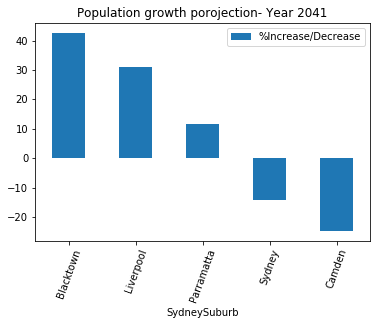

In [81]:


# Draw a vertical bar chart

df_popTrend.plot.bar(x="SydneySuburb", y="%Increase/Decrease", rot=70, title="Population growth porojection- Year 2041");

plt.show(block=True);




In [91]:
#get latitute and longitude of Victorial Village--a test to see that code is working
neighborhood_latitude = df_selSuburbWithLoc.loc[1, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_selSuburbWithLoc.loc[1, 'Longitude'] # neighborhood longitude value

# Victoria village neighbourhood
neighborhood_name = df_selSuburbWithLoc.loc[1, 'SydneySuburb'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Blacktown are -33.7668, 150.9053.


In [92]:
#call foursqaure api fucntion to get venues
CLIENT_ID = 'W3IIYS2EGJEW0ZZZMYSPOYPZOPBLB5WZORQCEU0ZQ4RIITEB' #  Foursquare ID
CLIENT_SECRET = '20RPHPBQY43G2OCV2IZ0Y0CLUP1O0BCDLDIHG0NK03GIMT0I' #  Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius=500
LIMIT =100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eca4ad7211536001bd01160'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Blacktown',
  'headerFullLocation': 'Blacktown, Sydney',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 39,
  'suggestedBounds': {'ne': {'lat': -33.7622999955, 'lng': 150.9107030631685},
   'sw': {'lat': -33.771300004500006, 'lng': 150.8998969368315}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e045d45e4cd92cb899d17c2',
       'name': 'Hoyts Xtreme Screen',
       'location': {'address': '17 Patrick St',
        'lat': -33.77030404193651,
        'lng': 150.90748671261412,
        'labeledLatLngs': [{'label': 'display',
          'lat': -33.770304

In [86]:
df_selSuburbWithLoc.head()

,SydneySuburb,Latitude,Longitude
0,Parramatta,-33.8136,151.0034
1,Blacktown,-33.7668,150.9053
2,Liverpool,-33.9286,150.9180
3,Camden,-34.0544,150.6958
4,Sydney,-33.8688,151.2093


In [94]:
#fucntion to get nearby venue---Source Coresera capstone Lab 
def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [152]:
SydneySuburb_venues = getNearbyVenues(names=df_selSuburbWithLoc['SydneySuburb'],
                                   latitudes=df_selSuburbWithLoc['Latitude'],
                                   longitudes=df_selSuburbWithLoc['Longitude'])
                                                    

Parramatta
Blacktown
Liverpool
Camden
Sydney


In [133]:
SydneySuburb_venues.columns

Index(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')

In [157]:

blacktown_venues=SydneySuburb_venues[SydneySuburb_venues['Neighborhood']=="Blacktown"]
blacktown_venues.head(20)
blacktown_category=blacktown_venues.groupby('Venue Category').size()
blacktown_category



AttributeError: 'Series' object has no attribute 'columns'

In [185]:
#blacktown_venues[['Neighborhood','Venue','Venue Category']]
parammata_venues=SydneySuburb_venues[SydneySuburb_venues['Neighborhood']=="Parramatta"]
parammata_venues.head(20)
parammata_category =parammata_venues.groupby('Venue Category').size()
parammata_category

Venue Category
Asian Restaurant             2
Australian Restaurant        1
Bakery                       2
Bookstore                    1
Burger Joint                 4
Café                         5
Chinese Restaurant           4
Coffee Shop                  3
Dentist's Office             1
Department Store             2
Dessert Shop                 3
Discount Store               1
Electronics Store            1
Fast Food Restaurant         3
Frozen Yogurt Shop           1
Greek Restaurant             1
Grocery Store                1
Gym                          1
Hotel                        1
Ice Cream Shop               1
Italian Restaurant           2
Japanese Restaurant          2
Juice Bar                    2
Lebanese Restaurant          2
Malay Restaurant             2
Mediterranean Restaurant     1
Mexican Restaurant           3
Middle Eastern Restaurant    1
Multiplex                    2
Park                         1
Portuguese Restaurant        1
Record Shop             

In [198]:
result = pd.merge(df_blacktownCategory, df_parammataCategory, how='outer', on='Venue Category')
result.head(100)


,BlackTown,Parramata
Venue Category,,
Asian Restaurant,1.0,2.0
Big Box Store,1.0,NaN
Bowling Alley,1.0,NaN
Buffet,1.0,NaN
Café,1.0,5.0
Chinese Restaurant,1.0,4.0
Climbing Gym,1.0,NaN
Clothing Store,1.0,NaN
Coffee Shop,2.0,3.0
